# CS985 – Advanced Machine Learning for Data Analytics Assignment
## Group 14 

1. Nishanth Nair  (Student ID: 202185332 ) <br/>
2. Kofi Mensah  (Student ID: 202177393 ) <br/>
3. Naina Vaish  (Student ID: 202173379 ) <br/>
4. Nikita Naik  (Student ID: 202176554 ) <br/>
5. Siddhesh Kokane  (Student ID: 202168774 ) <br/>
6. Oluwatobiloba Coker  (Student ID:  ) <br/>

## <u> Task - 1 – Classification Problem </u>

### **Building a model to predict whether the tumour is Malignant or Benign**  <br/>

In this part of the assignment, we are addressing the **classification problem** for which we are building a model to classify breast cancer tumour into **Malignant** or **Benign** type. The dataset has distinct features of tumours that can are used to determine the said types. We are provided with the following features of the tumours: <br/>

1.	Diagnosis 
2.	Radius_mean
3.	Texture_mean
4.	Perimeter_mean
5.	Area_mean
6.	Smoothness_mean
7.	Compactness_mean
8.	Concativity_mean
9.	Concave points_mean
10.	Symmetry_mean
11.	Fractal_dimension_mean
12.	Radius_se
13.	Texture_se
14.	Perimeter_se
15.	Area_se
16.	Smoothness_se
17.	Compactness_se
18.	Concativity_se
19.	Concave points_se
20.	Symmetry_se
21.	Fractal_dimension_se
22.	Radius_worst
23.	Texture_worst
24.	Perimeter_worst
25.	Area_worst
26.	Smoothness_worst
27.	Compactness_worst
28.	Concativity_worst
29.	Concave points_worst
30.	Symmetry_worst
31.	Fractal_dimension_worst **

The **target/dependent variable** is the **diagnosis** which will be obtained in form of **0** or **1**. <br/>

For the purpose of this report, we have assigned <u>***0 as the Benign type***</u> tumour and <u>***1 as Malignant type***</u> tumour. <br/>

**Breakdown of the classification problem:** <br/>

* It is a typical **supervised classification task** as we load dataset which is labelled with desired solutions.
* The current dataset we have is a **binary classification** problem as the task involves identifying between just two classes “Malignant” or “Benign”.
* It is **an offline batch learning problem** as it is once fed data it learns on the basis of that data and there is no continuous flow of new data flowing in. If either case was otherwise, we would have to adjust for continuous change and new features in the data. <br/>

**Performance Measure:** <br/>

We have used **Confusion Matrices** to represent our result for the classification model and used **accuracy scores** and **F1 scores** to evaluate the model. <br/>

**Libraries used:** <br/>

- **NumPy:** A fast numerical array structure and helper functions.<br/>
- **Pandas:** Supports a DataFrame structure to store data and work with them quickly and efficiently.<br/>
- **Matplotlib:** Basic plotting library in Python; most other Python plotting libraries are built on top of it.<br/>
- **Seaborn:** Advanced statistical plotting library.<br/>
- **Scikit-learn:** The essential Machine Learning package in Python.<br/>
- **Keras:** is a Python interface for artificial neural network; also acts as an interface for TensorFlow library<br/>

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the train and test dataset

train = pd.read_csv("train_100r.csv")
test = pd.read_csv("test_100r.csv")

In [3]:
# view the top rows in train dataset

train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414


In [4]:
# view the top rows in test dataset

test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,11.914462,10.399366,68.532774,195.624827,0.078282,0.133505,0.030642,0.025076,0.199481,...,12.483659,11.961359,85.471488,148.016468,0.087666,0.046050,0.289351,0.038040,0.349355,0.074248
1,1.0,7.107375,15.895246,93.288227,450.381515,0.100320,0.045394,0.018209,0.010265,0.178165,...,17.676051,20.864080,100.798972,817.094638,0.075030,0.180301,0.492751,0.096460,0.395112,0.098559
2,2.0,11.575929,20.435897,108.126199,1316.008018,0.109270,0.345116,0.412742,0.165474,0.215813,...,13.035890,19.029690,108.220078,1145.478120,0.082662,0.037770,0.424392,0.219969,0.503064,0.093896
3,3.0,17.049499,17.189036,122.326677,1042.768588,0.134032,0.093098,0.070388,0.078683,0.244361,...,16.751836,24.928188,91.684245,947.978048,0.103626,0.631425,0.252219,0.032718,0.268289,0.082652
4,4.0,10.815883,16.936336,91.779285,1117.781440,0.110550,0.203851,0.318877,0.050364,0.232977,...,16.795885,20.591944,114.458955,683.021463,0.181860,0.170216,0.508757,0.161784,0.574045,0.091577


## Exploratory Data Analysis:

In [5]:
#viewing all the information about the DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25524 entries, 0 to 25523
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       25524 non-null  int64  
 1   diagnosis                25524 non-null  int64  
 2   radius_mean              25524 non-null  float64
 3   texture_mean             25524 non-null  float64
 4   perimeter_mean           25524 non-null  float64
 5   area_mean                25524 non-null  float64
 6   smoothness_mean          25524 non-null  float64
 7   compactness_mean         25524 non-null  float64
 8   concavity_mean           25524 non-null  float64
 9   concave points_mean      25524 non-null  float64
 10  symmetry_mean            25524 non-null  float64
 11  fractal_dimension_mean   25524 non-null  float64
 12  radius_se                25524 non-null  float64
 13  texture_se               25524 non-null  float64
 14  perimeter_se          

We have a total of **25524 data points** for each feature of tumour in the training dataset, and with neither feature having a **NaN** data point.<br />
The **main features** of identifying the tumour are split in **3 major categories**, i.e. **mean**, **se (standard error)** and **worst**. The features in every sub-section can be explained in the following way (the definition is adopted from **https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data**): <br/>
1. **Radius:** Mean of distances from centre to points on the perimeter <br/>
2. **Texture:** Standard deviation of Gray-scale values <br/>
3. **Perimeter:** <br/>
4. **Area:** <br/>
5. **Smoothness:** Local variation in radius lengths <br/>
6. **Compactness:** (perimeter^2/area -1) <br/>
7. **Concavity:** Severity of concave portions of the contour <br/>
8. **Concave points:** number of concave portions of the contour <br/>
9. **Symmetry:** <br/>
10. **Fractal Dimension:** Coastline approximation – 1 <br/>


In [6]:
# checking for any null values in the dataset

train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# printing out summary statistics of the dataset

train.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,...,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000
mean,12761.500000,0.499843,12.587571,18.797795,97.909665,670.853706,0.106022,0.145079,0.150999,0.084847,...,20.061470,23.071630,134.652917,925.856172,0.114559,0.175136,0.348091,0.166719,0.343439,0.098569
std,7368.288472,0.500010,3.503795,5.360127,27.442430,389.374163,0.017768,0.074372,0.129404,0.058930,...,6.695670,6.030421,45.550691,566.589369,0.024297,0.144550,0.237368,0.089293,0.082335,0.024277
min,0.000000,0.000000,3.191287,5.996412,36.261743,13.066939,0.041578,0.006820,0.000004,0.000009,...,7.365272,8.120317,52.469394,2.476110,0.038316,0.000019,0.000024,0.000061,0.112617,0.052574
25%,6380.750000,0.000000,9.869745,14.779183,78.418036,402.636524,0.093072,0.088716,0.036953,0.032673,...,14.850159,18.678515,99.388127,514.927885,0.096844,0.073974,0.162795,0.090028,0.290525,0.082560
50%,12761.500000,0.000000,12.091910,18.227065,91.881158,555.694186,0.105574,0.132074,0.118348,0.079349,...,17.713607,22.510936,115.464171,759.650384,0.113319,0.137480,0.304954,0.156044,0.331700,0.091055
75%,19142.250000,1.000000,14.924692,22.241400,111.462838,838.174559,0.119046,0.181743,0.240190,0.121400,...,25.330763,26.852011,172.313135,1259.557683,0.129747,0.234840,0.484126,0.246340,0.375807,0.109395
max,25523.000000,1.000000,31.654623,37.532992,196.268248,3686.006697,0.182599,0.384272,0.572661,0.261141,...,40.339293,47.762364,290.031452,4386.880701,0.262451,1.085080,1.308318,0.362273,0.661336,0.181523


In [8]:
#We use a simple formula to place index as the ‘Id’

train.set_index('id', inplace= True)

In [9]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25519,1,15.378199,24.524667,72.034191,1250.914638,0.098105,0.252529,0.068109,0.068795,0.198235,...,31.305429,16.780569,190.050792,627.759997,0.121920,0.000928,0.074436,0.290126,0.350512,0.118959
25520,0,15.591372,10.434691,72.715151,564.971643,0.103050,0.058673,0.027190,0.075847,0.236273,...,15.636271,23.465578,104.049866,622.124967,0.097562,0.141443,0.092315,0.092860,0.236337,0.090834
25521,0,12.706935,14.591663,86.934808,449.956769,0.078482,0.144404,0.063969,0.026877,0.208236,...,13.711438,27.785133,99.711919,365.513346,0.115682,0.348765,0.348779,0.182106,0.270028,0.082580


To better understand the relation of each feature with others we use **pairwise correlation** and then display it in the correlation matrix heatmap for a better **visual analysis**.

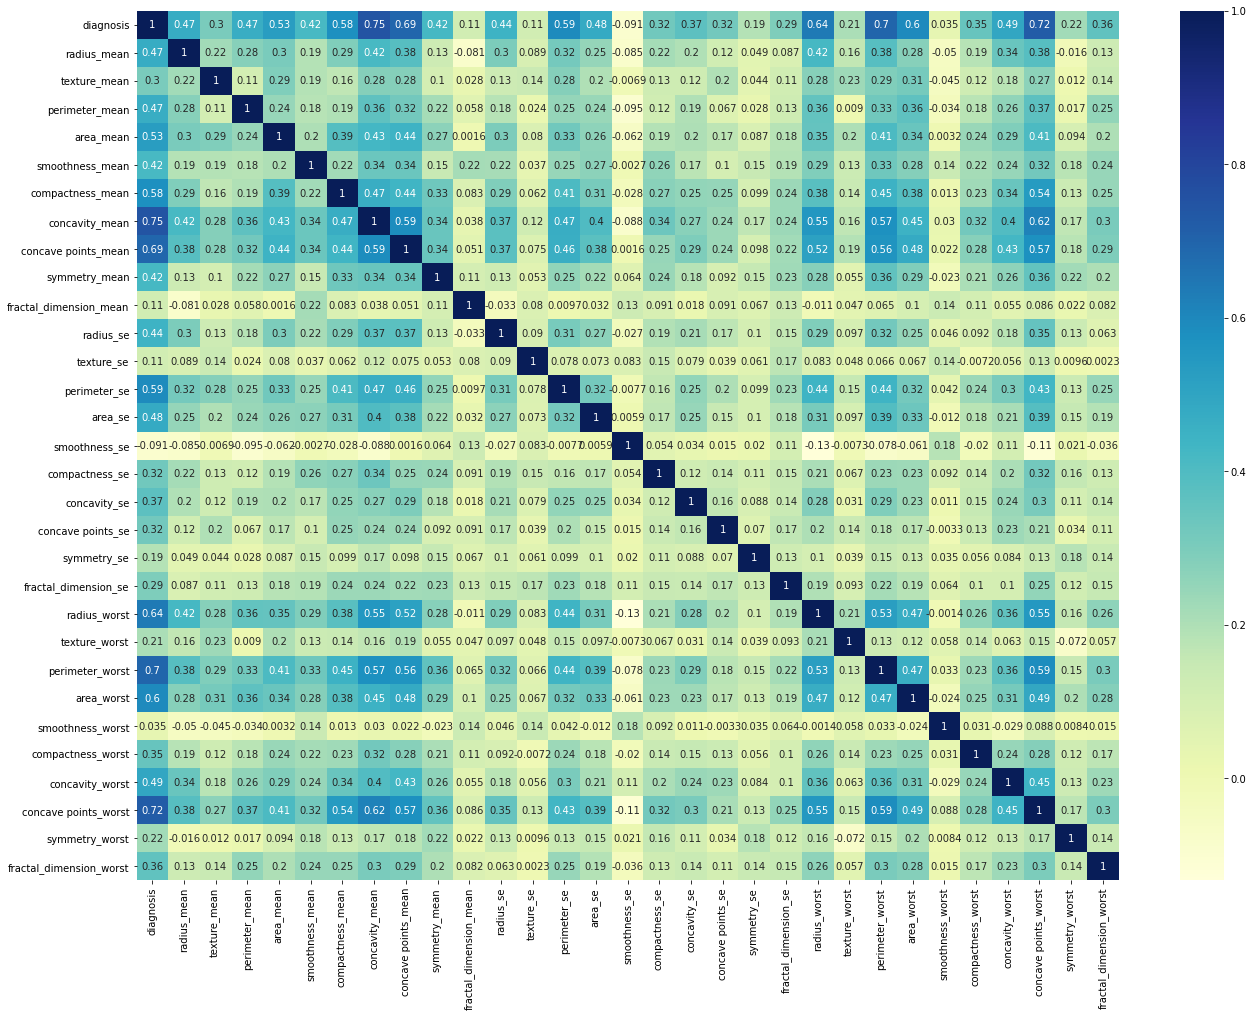

In [10]:
plt.figure(figsize = (22, 16))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We understand that having **30 features or independent variables** for our classification problem is **highly costly** and **time consuming** hence for this part of our assignment we have employed correlation matrix for **feature selection**, where we drop variables of **high multicollinearity**. <br/>


For this purpose, we have created a **benchmark** for multicollinearity as correlation **at 0.35**. <br/>

In [11]:
correlation = ['diagnosis', 'concavity_mean', 'concave points_worst', 'perimeter_worst', 'perimeter_se', 
               'radius_worst', 'concave points_mean', 'area_mean', 'area_worst', 'perimeter_mean','compactness_mean']
lis1 = [i for i in train.columns if i not in correlation]

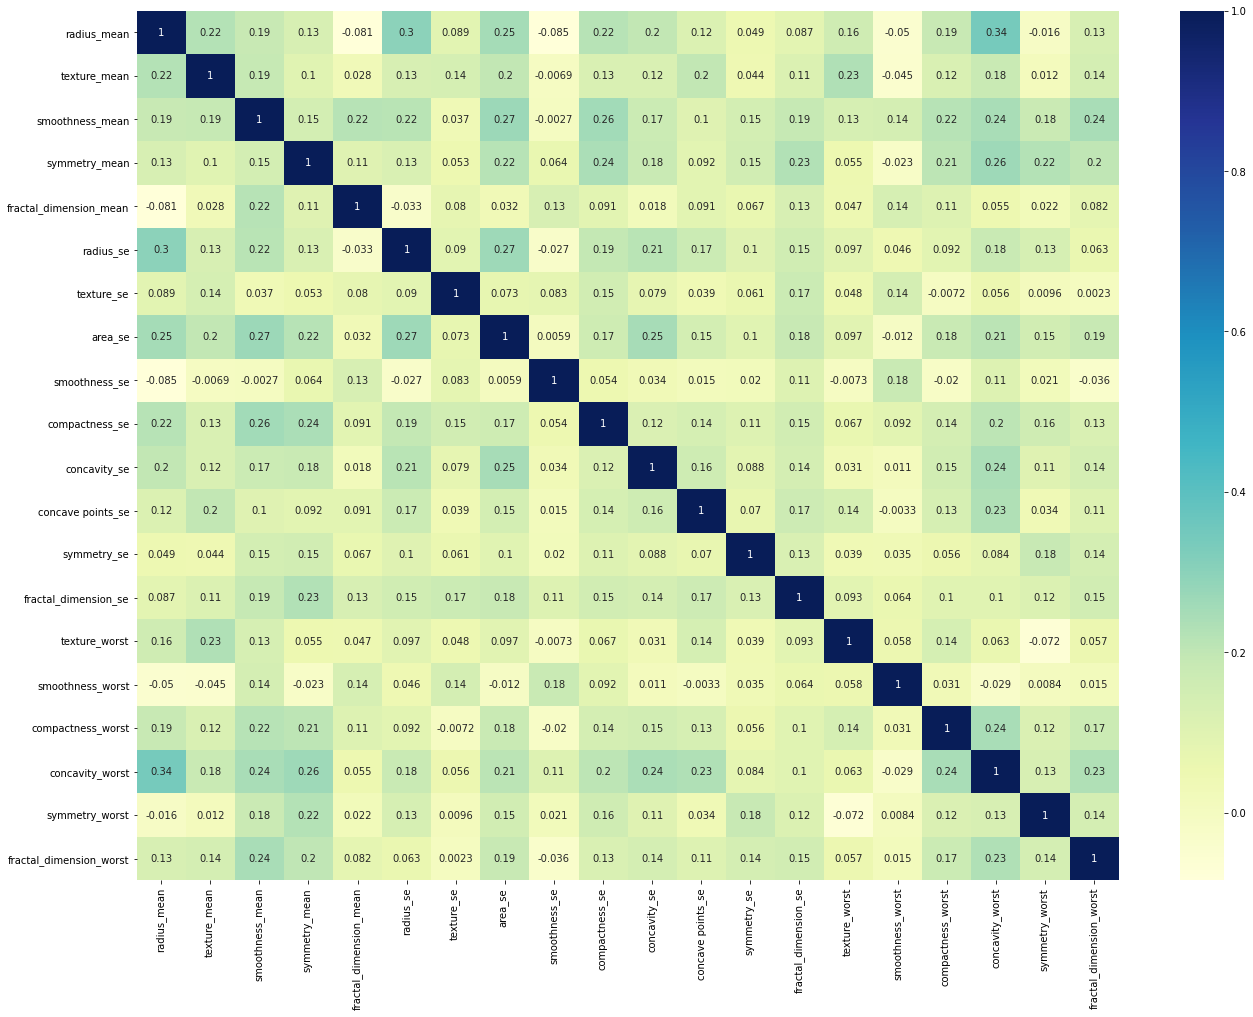

In [12]:
plt.figure(figsize = (22, 16))
sns.heatmap(train[lis1].corr(), annot = True, cmap="YlGnBu")
plt.show()

It is found that **``` 'concavity_mean', 'concave points_worst', 'perimeter_worst', 'perimeter_se', 'radius_worst', 'concave points_mean', 'area_mean', 'area_worst', 'perimeter_mean','compactness_mean'```** has most correlation. Hence we can remove them.<br/>

Through this process we successfully managed to bring down our list of 30 independent variable to **20 independent variables**.


In [13]:
# droping the column which has high multicollinearity

drop_list = ['concavity_mean', 'concave points_worst', 'perimeter_worst', 'perimeter_se', 'radius_worst', 
             'concave points_mean', 'area_mean', 'area_worst', 'perimeter_mean','compactness_mean']

In [14]:
train.drop(drop_list, axis = 1, inplace = True)

In [15]:
train.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
0,1,18.382336,7.256714,0.078681,0.210508,0.055248,0.255369,0.722193,85.082116,0.002664,...,0.044585,0.000286,0.023565,0.003074,13.025038,0.118997,0.319514,0.783059,0.529692,0.160792
1,0,10.302042,16.758441,0.129037,0.226011,0.055626,0.423316,0.460322,33.004720,0.009135,...,0.009606,0.006042,0.009498,0.006299,25.704716,0.157770,0.122358,0.022506,0.279209,0.075751
2,0,8.045502,16.094636,0.077613,0.186815,0.051772,0.338873,0.501980,6.998861,0.005387,...,0.013196,0.001472,0.013668,0.002495,22.345908,0.110365,0.093854,0.411800,0.343249,0.093198
3,0,11.064261,26.550410,0.116053,0.221436,0.068286,0.238846,1.100755,32.812166,0.013801,...,0.024186,0.008508,0.063533,0.006227,24.488840,0.119673,0.174270,0.062492,0.361843,0.090056
4,1,6.892966,27.320674,0.116123,0.301315,0.059410,0.044660,0.303814,12.585982,0.005510,...,0.034497,0.005010,0.028522,0.008266,22.585051,0.114831,0.166710,0.198205,0.342547,0.105414


In [16]:
# shows number of rows and columns

train.shape

(25524, 21)

In [17]:
#Save the test_ID

test_ID = test['id']
test_ID = test_ID.dropna()
test_ID.astype(int)

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: id, Length: 100, dtype: int32

In [18]:
test.drop('id', axis = 1, inplace= True)

In [19]:
test.drop(drop_list, axis = 1, inplace = True)

In [20]:
test.head()

,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,11.914462,10.399366,0.078282,0.199481,0.054877,0.318265,0.503511,14.875548,0.005783,0.015040,0.008799,0.006620,0.009875,0.000368,11.961359,0.087666,0.046050,0.289351,0.349355,0.074248
1,7.107375,15.895246,0.100320,0.178165,0.057009,0.051749,0.486811,15.120534,0.000760,0.010272,0.003645,0.002176,0.024627,0.003252,20.864080,0.075030,0.180301,0.492751,0.395112,0.098559
2,11.575929,20.435897,0.109270,0.215813,0.059694,0.252043,1.426859,41.015317,0.003814,0.040981,0.032631,0.003976,0.021824,0.006841,19.029690,0.082662,0.037770,0.424392,0.503064,0.093896
3,17.049499,17.189036,0.134032,0.244361,0.066792,0.539824,1.817885,132.683659,0.006678,0.038642,0.059024,0.012475,0.017241,0.008187,24.928188,0.103626,0.631425,0.252219,0.268289,0.082652
4,10.815883,16.936336,0.110550,0.232977,0.058317,0.137775,1.642414,11.395728,0.005705,0.043478,0.042031,0.002940,0.024664,0.003106,20.591944,0.181860,0.170216,0.508757,0.574045,0.091577


In [21]:
test.shape

(158, 20)

In [22]:
test.isnull().sum()

radius_mean                58
texture_mean               58
smoothness_mean            58
symmetry_mean              58
fractal_dimension_mean     58
radius_se                  58
texture_se                 58
area_se                    58
smoothness_se              58
compactness_se             58
concavity_se               58
concave points_se          58
symmetry_se                58
fractal_dimension_se       58
texture_worst              58
smoothness_worst           58
compactness_worst          58
concavity_worst            58
symmetry_worst             58
fractal_dimension_worst    58
dtype: int64

While understanding our test data, we can come across a **strange anomaly** where when test data loaded to python reads extra **58 rows** with no data points, which we simply drop.


In [23]:
test = test.dropna()

In [24]:
test.shape

(100, 20)

In [25]:
test.isnull().sum()

radius_mean                0
texture_mean               0
smoothness_mean            0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

For further comprehensive understanding of data, we check for presence of **degree of outliers** in the data.

In [26]:
#Counting the number of Data points contributing to Benign (0) or Malignant (1) tumour type

train['diagnosis'].value_counts()

0    12766
1    12758
Name: diagnosis, dtype: int64

In [27]:
#Calculating the Inter-Quartile Range (IQR) for our chosen 20 variables. 

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

In [28]:
print(IQR)

diagnosis                   1.000000
radius_mean                 5.054947
texture_mean                7.462216
smoothness_mean             0.025974
symmetry_mean               0.047425
fractal_dimension_mean      0.008417
radius_se                   0.243192
texture_se                  0.660515
area_se                    65.622629
smoothness_se               0.003717
compactness_se              0.026601
concavity_se                0.034609
concave points_se           0.007374
symmetry_se                 0.010513
fractal_dimension_se        0.003234
texture_worst               8.173496
smoothness_worst            0.032903
compactness_worst           0.160866
concavity_worst             0.321331
symmetry_worst              0.085283
fractal_dimension_worst     0.026835
dtype: float64


We have used the following formula to identify the presence of outliers in each feature. **True** represents the **number of outliers** present in each feature.

In [29]:
truefalse = (train < (Q1 - 1.5 * IQR))|(train > (Q3 + 1.5 * IQR))
#truefalse.unique().value_counts()

In [30]:
for i in train.columns:
    print(truefalse.groupby(i).size())

diagnosis
False    25524
dtype: int64
radius_mean
False    25364
True       160
dtype: int64
texture_mean
False    25367
True       157
dtype: int64
smoothness_mean
False    25390
True       134
dtype: int64
symmetry_mean
False    24765
True       759
dtype: int64
fractal_dimension_mean
False    24780
True       744
dtype: int64
radius_se
False    23761
True      1763
dtype: int64
texture_se
False    24748
True       776
dtype: int64
area_se
False    24037
True      1487
dtype: int64
smoothness_se
False    24814
True       710
dtype: int64
compactness_se
False    24882
True       642
dtype: int64
concavity_se
False    24824
True       700
dtype: int64
concave points_se
False    24691
True       833
dtype: int64
symmetry_se
False    24121
True      1403
dtype: int64
fractal_dimension_se
False    24452
True      1072
dtype: int64
texture_worst
False    25257
True       267
dtype: int64
smoothness_worst
False    25262
True       262
dtype: int64
compactness_worst
False    24409
True      

In [31]:
#Preparing the variables for the model

target = 'diagnosis'
lis = [i for i in train.columns if i not in target]
y = train[target]
X = train[lis]

In [32]:
#We use the hold-out method for training our model.

from fast_ml.model_development import  train_valid_test_split

In this method we use the **train_valid_test_split** to split our data in the ratio of **0.7, 0.15 and 0.15**.<br/>

As **hold-out method** is good for large dataset it was our preferable choice. In addition, as **cross-validation** uses multiple train_valid_test splits, it takes **higher computational power and time to run**.<br/>

As we have not used cross-validation method, we employ the alternative **validation dataset split** provide us with **unbiased results** and then we combine it with our training dataset split to fit the model and evaluate its final performance.


In [33]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(train, target='diagnosis', train_size=0.7, valid_size=0.15, test_size=0.15)

## Standard Baseline Model

Baseline model is a method that uses simple sub-optimal techniques, simple summary statistics, or randomness to create predictions for a dataset. We then use the baseline's performance, accuracy and F1-scores and use this as a benchmark for our other models to surpass. This is a good method by which we can improve our models.<br/>

For our case we have used a **simple linear regression model**.

In [34]:
#Standard Baseline model

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr = (y_pred_lr > 0.5)

accuracy_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 8, verbose = 1)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f'Accuracy is {accuracy_lr}')
print(f'r2_Score is {r2_lr}')
print(f'Mean Squared error is {mse_lr}')

Accuracy is [0.65694717 0.68715592 0.654223   0.66701576 0.67291316 0.67289422
 0.67950226 0.66732911]
r2_Score is 0.6865550194583108
Mean Squared error is 0.07834943849569079


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [35]:
print("F1 Score of Linear Regression Model: %.2f" %(f1_score(y_test, y_pred_lr)*100))

F1 Score of Linear Regression Model: 91.91


In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## Artificial Neural Network

We initialise the **Artificial Neural Network (ANN)** and add layers to it. With the help of Keras we build a **3 layer** deep neural network where we have **two hidden layers**.  Use of ANN is approprite since the size of dataset is large and ANN helps in identifying relationships between the dependent and independent variables. For our model we have used just 2 hidden layers to **avoid overfitting** of the data and hamper the classification accuracy of the model. We used a combination of **'relu'** and **'sigmoid'** activation as they are most apt to get results from neurons in form of 0 and 1. <br/>

From the family of adaptive optimizers we have chosen **'adam'** as there is almost no need to fine tune it's learning rate for better fitting of the model, in addition it also takes into account the **scatternesss** of the data which improves its data configuration. For the loss value function we have employed 'binary_crossentropy' as it is perfect for this binary classifcation problem.

In [37]:
# Initialising Baseline ANN

NN_model = keras.Sequential()
NN_model.add(Dense(12, input_dim=20, activation='relu'))
NN_model.add(Dense(10, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

In [38]:
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
#We check for the fit of our model.

NN_model.fit(X_train, y_train, batch_size = 10, epochs = 200, validation_data = (X_valid, y_valid), verbose = 0)

<br/>
We make predictions and compare the accuracy and loss of data to the actual valid and test dataset splits. <br/>



In [40]:
predictions1 = (NN_model.predict(X_train) > 0.5).astype(int)

NN_loss_valid, NN_accuracy_valid = NN_model.evaluate(X_valid, y_valid)
print('Accuracy on Validation Dataset: %.2f' % (NN_accuracy_valid*100))
print('Loss on Validation Dataset: %.2f' % (NN_loss_valid*100))

120/120 [==============================] - 0s 715us/step - loss: 0.1785 - accuracy: 0.9300
Accuracy on Validation Dataset: 93.00
Loss on Validation Dataset: 17.85


In [41]:
NN_model.fit(X_test, y_test, batch_size = 10, epochs = 200, verbose=0)
NN_loss_test, NN_accuracy_test = NN_model.evaluate(X_test, y_test)
print('Accuracy on Test Dataset: %.2f' % (NN_accuracy_test*100))
print('Loss on Test Dataset: %.2f'%(NN_loss_test*100))

120/120 [==============================] - 0s 938us/step - loss: 0.1656 - accuracy: 0.9342
Accuracy on Test Dataset: 93.42
Loss on Test Dataset: 16.56


<br/>
We notice that the accuracy for the test dataset improves this because model it takes into account the learnings from the validation dataset and improves the final model. <br/>

We use confusion matrix to represent the classification of our data into true positive, true negative, false positive and false negative for both valid and test data splits.


In [42]:
NN_predictions_test = (NN_model.predict(test) > 0.5).astype(int)

In [43]:
# Predicting the Test set results

NN_y_pred = NN_model.predict(X_test)
NN_y_pred = (NN_y_pred > 0.5)

In [51]:
print('F1 Score of Baseline Neural Network Model: {0:.2f}%'.format(f1_score(y_test, NN_y_pred)*100))

F1 Score of Baseline Neural Network Model: 93.32%


<AxesSubplot:>

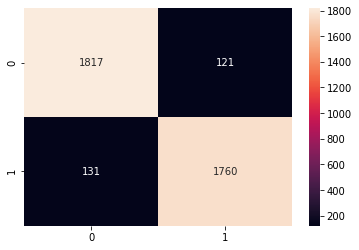

In [45]:
# Making the Confusion Matrix

cm1 = confusion_matrix(y_test, NN_y_pred)
sns.heatmap(cm1, annot=True, fmt='g')

In [46]:
# Predicting the valid set results

y_val_pred = NN_model.predict(X_valid)
y_val_pred = (y_val_pred > 0.5)

<AxesSubplot:>

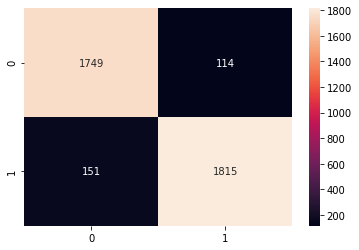

In [47]:
cm2 = confusion_matrix(y_valid, y_val_pred)
sns.heatmap(cm2, annot=True, fmt='g')

## Recurrent Neural Network

For our next model we have used simple recurrent neural network. With this model we are choosing unorthodox method of using RNN. Our basis to use the model is that RNN is good for classifcation prediction problem. 

In [49]:
# Model 2 -  Recurrent Neural Network

RNN_model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences= True, input_shape=[None, 1]), 
keras.layers.SimpleRNN(20, return_sequences= True), 
keras.layers.SimpleRNN(1)
])

RNN_model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

RNN_model.summary()
RNN_model.fit(X_train, y_train, batch_size = 10, epochs = 200, validation_data = (X_valid, y_valid), verbose=0)
#mse_test = model.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


ValueError: in user code:

    c:\python\python39\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    c:\python\python39\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    c:\python\python39\lib\site-packages\keras\engine\training.py:770 train_step  *
        y_pred = self(x, training=True)
    c:\python\python39\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\python\python39\lib\site-packages\keras\engine\input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 20)


<br/>
We make predictions and compare the accuracy and loss of data to the actual valid and test dataset splits.

In [ ]:
RNN_predictions = (RNN_model.predict(X_train) > 0.5).astype(int)
RNN_loss_valid, RNN_accuracy_valid = RNN_model.evaluate(X_valid, y_valid)
print('Accuracy on Validation Dataset: %.2f' % (RNN_accuracy_valid*100))
print('Loss on Validation Dataset: %.2f' % (RNN_loss_valid*100))

In [ ]:
RNN_model.fit(X_test, y_test, batch_size = 10, epochs = 200, verbose = 0)
RNN_loss_test, RNN_accuracy_test = RNN_model.evaluate(X_test, y_test)
print('Accuracy on Test Dataset: %.2f' % (RNN_accuracy_test*100))
print('Loss on Test Dataset: %.2f'%(RNN_loss_test*100))

In [ ]:
RNN_pred = (RNN_model.predict(test) > 0.5).astype(int)

In [ ]:
# Predicting the Test set results
RNN_y_pred = RNN_model.predict(X_test)
RNN_y_pred = (RNN_y_pred > 0.5)
# y_test_arg = (y_test > 0.5)
print("F1 Score of Recurrent Neural Network Model: %.2f" %(f1_score(y_test, RNN_y_pred)*100))

<br/>

We have accuracy, F1 score and loss for all these models and on the basis of this, especially **f1 scores**, we can see that **" " model** has performed better and retained minimum loss compared to others. F1 scores were preferred over accuracy for making a choice of the final model for prediction as it is able to balance between both precision and recall but also improves the problems caused by imbalanced classification. <br/>
Hence, **" " model** was used for our **final predictions** on the actual test dataset.
<br/>

In [ ]:
submission = pd.DataFrame(test_ID)
submission ['diagnosis'] = NN_predictions_test
submission['id'] = submission['id'].astype(int)
#submission.drop('id', axis = 1)
submission

In [ ]:
submission.to_csv("Prediction.csv", index = False, header = True)